### T5 Online Data Science Bootcamps for SDAIA Academy

## <span style='color:#E50914'>Netflix TV shows and movies.</span>
### Find out if Netflix has more focus on TV Shows than movies in recent years
------------------------------------------------------------------------


##### <span style='color:#E50914'>Projec Problem and Solution Context:</span>

   Netflix is one of the most popular media and video streaming platforms. They have more than 8000 movies or TV shows available on their platform, as of mid-2021, they have more than 200 million subscribers globally, and for producers, it is very important to choose between making movies or TV show to get high revenue.
   
   The aim of this project is to find out if Netflix has more focus on TV Shows than movies in recent years by using ML to help the producers to choose the right decision to produce TV-Shows or movies.
   
##### <span style='color:#E50914'>Datasets:</span>

   The dataset used from Kaggle website and it provided in .csv format, This dataset contains 12 columns and 8807 Rows about the netflix TV shows and movies. The most relevant feature to this project is (Release year) since we want to see which type ( TV Shows or movies) Netflix has more focus in recent years.
   
* show_id: Unique ID for every Movie / TV Show
* type: Identifier - A Movie or TV Show
* title: Title of the Movie / TV Show
* director: Director of the Movie / TV show
* cast: Actors involved in the Movie / TV show
* country: Country where the Movie / TV show was produced
* date_added: Date it was added on Netflix
* release_year: Actual Release year of the Movie / TV show
* rating: Rating of the Movie / TV show
* duration: Total Duration - in minutes or number of seasons
* listed_in: Genre of the Movie / TV show
* description: The summary description of the Movie / TV show



-------------------------------------------------------------------------------------

# <span style='color:#E50914'> 1/ Importing The Libraries </span>
* In this section we are going to import the libraries will be used 

In [1]:
# Necessary imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score,f1_score ,plot_confusion_matrix



# <span style='color:#E50914'>2/ Load Dataset</span>

* In this section we are going to load the data.

In [2]:
# let's load the data and store it in a Pandas DataFrame as netflixDF
netflixDF = pd.read_csv('netflix_titles.csv')

# <span style='color:#E50914'> 3/ EDA </span>
 * In this section we are going to apply EDA (numerical and visualization)
 ### Going to apply some numircal EDA 

In [3]:
# Take a quick look to the top five rows of data
netflixDF.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### from above result we can observed that we have null values in column(director,cast,country) also a quick look to the data

In [4]:
# Take a look to the number of rows and columns in the dataset
netflixDF.shape

(8807, 12)

#### In the above we applied shape method to see number of rows and columns and we get(12 columns and 8807 rows)

In [5]:
# Take a basic overview of the data.
netflixDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### In the above we applied info method it gives a quick look to our data such as: 
* Column data type
* Column that contain null or missing value
* Number of columns and rows

#### And the result is:
* we have 12 column with only 2 datatype (11 column with data type object,1 column with data type int)
* we have some columns with null or missing value (director,cast,country,date_added,rating,duration)
* Number of column is 12 and number of row is 8807 


In [6]:
# Checking number of null value in each columns
netflixDF.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### As we see above we have 6 column contain null or missing values 
* director has 2634 null values 
* cast has 825 null values 
* country has 831 null values 
* date_added has 10 null values
* rating has 4 null values 
* duration has 3 null values 

In [7]:
# check the percentage of null or missing value for each column to take the decision to drop or fill missing value 
netflixDF.isna().sum()*100 /netflixDF.shape[0]

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

#### since we have a small data and after see the result above we are going to:
* diroctor has about 30% which is more the 5%  -->  replace the missing value with mode
* cast has about 9% which is more the 5%  -->  replace the missing value with mode
* country has about 9% which is more the 5%  -->  replace the missing value with mode
* date_added has about 0.1% which is less the  3% -->  delete the rows
* rating has about 0.04% which is less the 3%  -->  delete the rows
* duration has about 0.03% which is less the 3%  -->  delete the rows

In [8]:
# before we start we are going to take a copy of our data to protect it and use the copy for cleaing  
netflixDFcopy = netflixDF.copy()
netflixDFcopy

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


#### Start cleaning the data column by column

In [9]:
# director (replace with mode)
netflixDFcopy.director.fillna(netflixDFcopy.director.mode()[0],inplace=True)

# cast (replace with mode)
netflixDFcopy.cast.fillna(netflixDFcopy.cast.mode()[0],inplace=True)

# country (replace with mode)
netflixDFcopy.country.fillna(netflixDFcopy.country.mode()[0],inplace=True)

# date_added (drop rows)
netflixDFcopy.dropna(subset=['date_added'],inplace=True)

# rating (drop rows)
netflixDFcopy.dropna(subset=['rating'],inplace=True)

# duration (drop rows)
netflixDFcopy.dropna(subset=['duration'],inplace=True)

In [10]:
# checking null or missing values
netflixDFcopy.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### As we see above there is no longer missing value.

In [11]:
# the data after cleaning 
netflixDFcopy

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Rajiv Chilaka,David Attenborough,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [12]:
# we are going to extract the year from date_year so we can see if it can be used 
netflixDFcopy['year_added'] = pd.DatetimeIndex(netflixDFcopy['date_added']).year

In [13]:
# Now see the data after add new column
netflixDFcopy

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019
8803,s8804,TV Show,Zombie Dumb,Rajiv Chilaka,David Attenborough,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020


In [14]:
netflixDFcopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
 12  year_added    8790 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 961.4+ KB


#### Going to take a look to the numerical data in our dataset and see if there is an outlier.

In [15]:
# Take a look to the numerical data in our dataset.
netflixDFcopy.describe()

,release_year,year_added
count,8790.000000,8790.000000
mean,2014.183163,2018.873606
std,8.825466,1.573568
min,1925.000000,2008.000000
25%,2013.000000,2018.000000
50%,2017.000000,2019.000000
75%,2019.000000,2020.000000
max,2021.000000,2021.000000


#### Now we have to check if there is an outlier
* mean and meadin of the release_year and year_added are normal and close 
* the min value in release_year is 1925 and netflix start publish the movies and TV shows in 1997 so this is an outlier  and we have to replace the values less than 1997 with start year.

In [16]:
netflixDFcopy.release_year.sort_values()

4250    1925
7790    1942
8205    1942
8763    1943
8739    1943
        ... 
862     2021
861     2021
857     2021
876     2021
965     2021
Name: release_year, Length: 8790, dtype: int64

In [17]:
# we are going to replace the date are less than 1997 with 1997
netflixDFcopy.loc[netflixDFcopy['release_year'] < 1997, 'release_year'] = 1997

In [18]:
netflixDFcopy.release_year.sort_values()

7961    1997
1768    1997
1761    1997
6130    1997
6864    1997
        ... 
862     2021
861     2021
857     2021
876     2021
965     2021
Name: release_year, Length: 8790, dtype: int64

In [19]:
netflixDFcopy.describe()

,release_year,year_added
count,8790.000000,8790.000000
mean,2014.850171,2018.873606
std,6.125899,1.573568
min,1997.000000,2008.000000
25%,2013.000000,2018.000000
50%,2017.000000,2019.000000
75%,2019.000000,2020.000000
max,2021.000000,2021.000000


In [20]:
netflixDFcopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
 12  year_added    8790 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 961.4+ KB


* Now our data is clean
### Going to apply some visualization

Text(0.5, 1.0, 'Type of Netflix show')

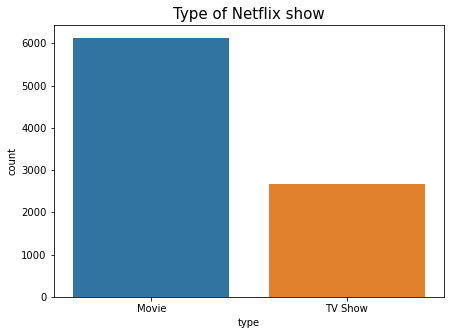

In [21]:
# Type feature 
plt.figure(figsize=(7,5))
sns.countplot(x='type',data=netflixDFcopy)
plt.title('Type of Netflix show',fontsize = 15)


#### As we see above our target feature is unbalanced and the movies is the most prduced than TV show 


Text(0.5, 1.0, 'Riting of Netflix')

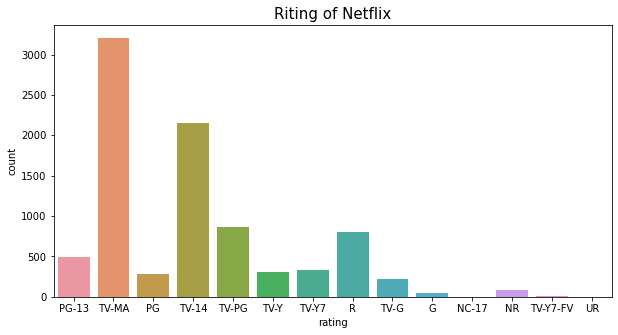

In [22]:
# Rating Feature
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=netflixDFcopy)
plt.title('Riting of Netflix',fontsize = 15)

#### As we see above rating data are skewed to the right and TV-MA is the highest riting 

Text(0.5, 1.0, 'Release year of Netflix show')

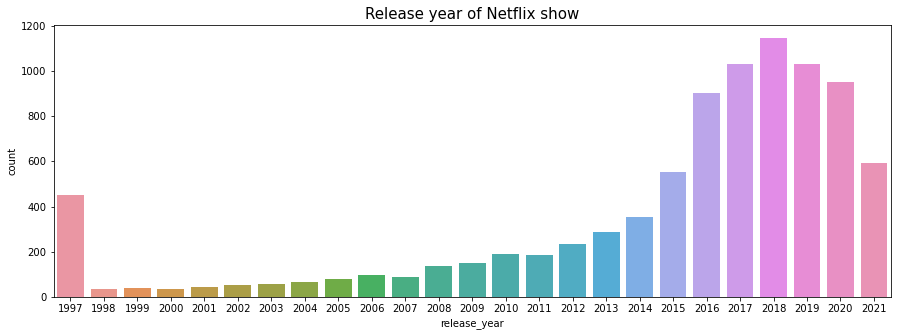

In [23]:
# Release year feature 
plt.figure(figsize=(15,5))
sns.countplot(x='release_year',data=netflixDFcopy)
plt.title('Release year of Netflix show',fontsize = 15)

#### As we see above release year data are skewed to the left and (2018) is Most production year

Text(0.5, 1.0, 'Year Added of show on Netflix')

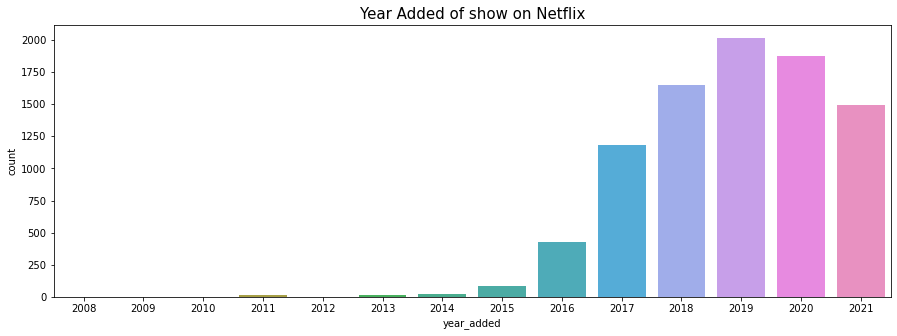

In [24]:
# Year Added feature 
plt.figure(figsize=(15,5))
sns.countplot(x='year_added',data=netflixDFcopy)
plt.title('Year Added of show on Netflix',fontsize = 15)

#### As we see above Added year data are skewed to the left and (2019) is Most year have been added the show before release them.

Text(0.5, 1.0, 'Rating VS Type')

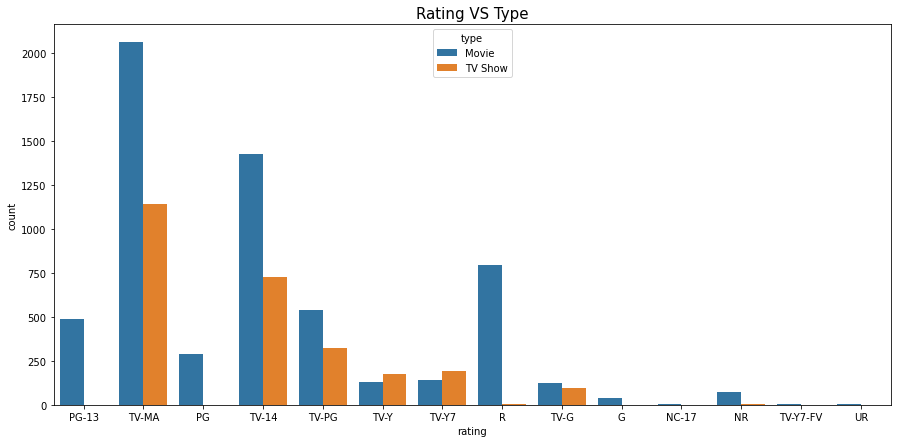

In [25]:
# see the rating feature along with type feature 
plt.figure(figsize=(15,7))
sns.countplot(x='rating',hue='type',data=netflixDFcopy)
plt.title('Rating VS Type',fontsize = 15)

#### As we see in the above the most of rating (Audience) prefer to watch movie more than TV show

Text(0.5, 1.0, 'Release year VS Type')

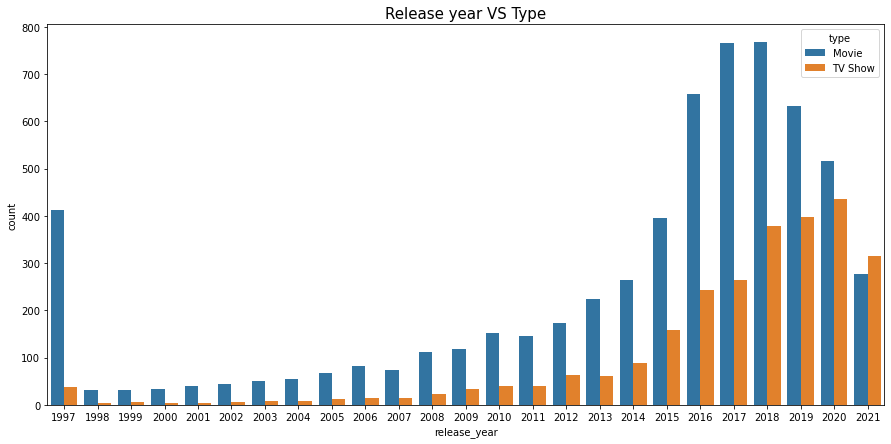

In [26]:
# see the Release year feature along with type feature 
plt.figure(figsize=(15,7))
sns.countplot(x='release_year',hue='type',data=netflixDFcopy)
plt.title('Release year VS Type',fontsize = 15)

#### As we see in the above, movie has been the most produced over all years except last year the TV show is the most produced

Text(0.5, 1.0, 'Year Added VS Type')

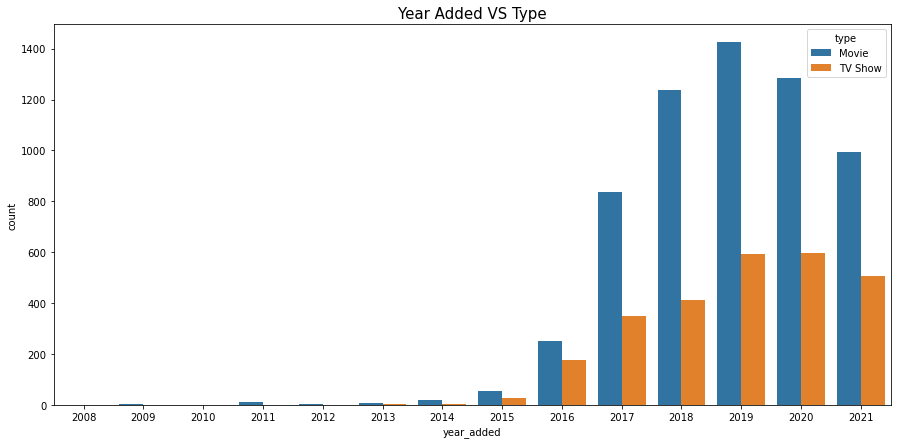

In [27]:
# see the Year Adeed feature along with type feature 
plt.figure(figsize=(15,7))
sns.countplot(x='year_added',hue='type',data=netflixDFcopy)
plt.title('Year Added VS Type',fontsize = 15)

#### As we see in the above, movie has been the most produced over all years.

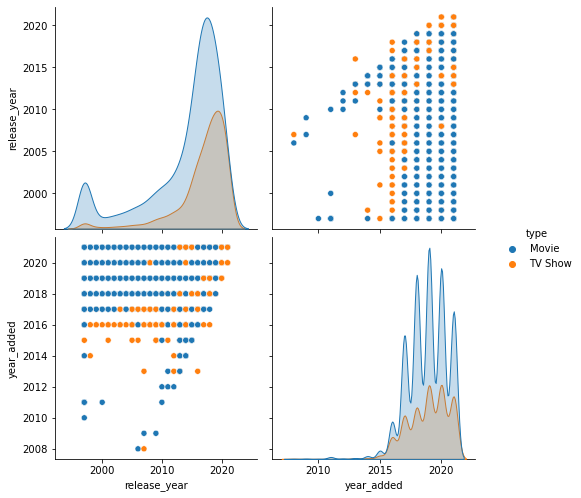

In [28]:
# Now apply a pairplot to see the best feature match
sns.pairplot(netflixDFcopy, diag_kind='kde',hue='type',height=3.5)

#### As we see above we have only 2 features that visually "separate" the two classes(type) and all of them have almost big overlap but we are going to use them in our model also the featuer release_year realted to our qustion.



# <span style='color:#E50914'> 4/ preprocessing for modeling</span>


In [29]:
netflixDFcopy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


#### Now we are going to drop unnecessary columns that will not be used in our solution.

In [30]:
netflixDFcopy.drop(columns=['show_id','title','director','cast','country'
                            ,'date_added','duration','listed_in','description'],inplace=True)

In [31]:
netflixDFcopy.head()

,type,release_year,rating,year_added
0,Movie,2020,PG-13,2021
1,TV Show,2021,TV-MA,2021
2,TV Show,2021,TV-MA,2021
3,TV Show,2021,TV-MA,2021
4,TV Show,2021,TV-MA,2021


#### Now we still have rating in string datatype and we are going to convert it using dummies

In [32]:
netflixDFcopy.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [33]:
netflixDFcopy = pd.get_dummies(netflixDFcopy,columns=['rating'])
netflixDFcopy.head()

,type,release_year,year_added,rating_G,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR
0,Movie,2020,2021,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,TV Show,2021,2021,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,TV Show,2021,2021,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,TV Show,2021,2021,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,TV Show,2021,2021,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# <span style='color:#E50914'> 5/ Train Test Split </span>
* In this section we are going to use train_test_split to split the data into a training set and a testing set.


#### Now going to split data to train set test set

1. The y will be the target feature (type)
2. The X will 
* first time will be all the featuer 
* second time will be (release_year) featuer since it is releted to our solution 



In [34]:
# start with all featur in y 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(netflixDFcopy.drop(['type'],axis=1),netflixDFcopy['type'],test_size=0.2,random_state=42)

# <span style='color:#E50914'> 6/ Standardize the Variables</span>
* In this section we are going to aplly feature scaling since there some of them are not same unit

In [35]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# <span style='color:#E50914'> 7/ Modeling </span>
* we are going to apply logistic regression, KNN, Random Forest in our solution
* Movie will be postive value 0
* TV show will be nigitive value 1



#### Start with data split with y that have all features !!!

### <span style='color:#FFA533'> Logistic Regression Model and evaluation with All feature </span>

In [36]:
# logistic regression algorithm 
lr = LogisticRegression()

lr.fit(X_train_scaled,y_train)
lr_pred = lr.predict(X_test_scaled)

print('WITH Logistic Algorithm')
print('\n')
print(confusion_matrix(y_test,lr_pred))
print('\n')
print(classification_report(lr_pred,y_test))

WITH Logistic Algorithm


[[1186   41]
 [ 471   60]]


              precision    recall  f1-score   support

       Movie       0.97      0.72      0.82      1657
     TV Show       0.11      0.59      0.19       101

    accuracy                           0.71      1758
   macro avg       0.54      0.65      0.51      1758
weighted avg       0.92      0.71      0.79      1758



Since our target class unbalanced we check weighted avg which is 79% 

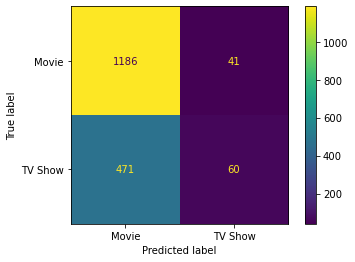

In [37]:
plot_confusion_matrix(lr, X_test_scaled, y_test)


As we above we 1186 movie was predict correctly and and 60 TV show prdict correctly but with 471 and 41 are predict uncrrectly 

In [38]:
f1_score(y_test,lr_pred,average='weighted')

0.6313947635048193

In [39]:
accuracy_score(y_test,lr_pred)

0.7087599544937428

As the result of above we observed that the performance underfit between predction and train data

### <span style='color:#FFA533'> KNN Model and evaluation with All feature </span>

In [40]:
# k-nearest neighbors algorithm
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

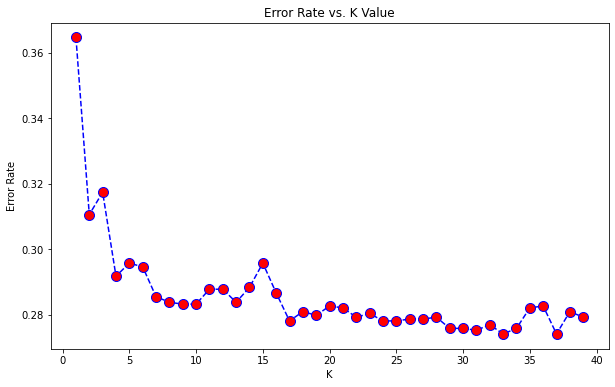

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

using elbow method help us to select KNN value with less error rate and the result above is k=17

In [42]:
# with the plot above will choose K20 that have least error
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train_scaled,y_train)
knn_pred = knn.predict(X_test_scaled)

print('WITH K=17')
print('\n')
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

WITH K=17


[[1048  179]
 [ 310  221]]


              precision    recall  f1-score   support

       Movie       0.77      0.85      0.81      1227
     TV Show       0.55      0.42      0.47       531

    accuracy                           0.72      1758
   macro avg       0.66      0.64      0.64      1758
weighted avg       0.71      0.72      0.71      1758



Since our target class unbalanced we check weighted avg which is 71% and the result is worse than logistic model wich is 79%

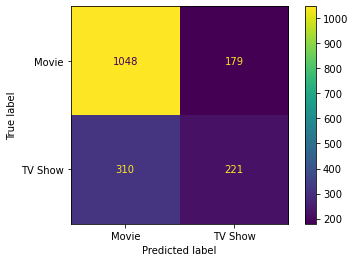

In [43]:
plot_confusion_matrix(knn, X_test_scaled, y_test)

As we see above from confusion metrix 
* 1048 movie was predict correctly as movie
* 221 TV show was prdict correctly as Tv show  
* 310 TV shaow predict uncorrectly as movie 
* 179 movie was prdict uncorrectly as Tv show 

In [44]:
f1_score(y_test,knn_pred,average='weighted')

0.709321497435017

In [45]:
accuracy_score(y_test,knn_pred)

0.7218430034129693

As the result of above we observed that the performance justfit between predction and train data wich is good

### <span style='color:#FFA533'> Random Forest Model and evaluation with All feature</span>

In [46]:
# applay Random Forest Classifier
rfc= RandomForestClassifier()

rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

print('WITH Random Forest Algorithm')
print('\n')
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(rfc_pred,y_test))

WITH Random Forest Algorithm


[[1051  176]
 [ 307  224]]


              precision    recall  f1-score   support

       Movie       0.86      0.77      0.81      1358
     TV Show       0.42      0.56      0.48       400

    accuracy                           0.73      1758
   macro avg       0.64      0.67      0.65      1758
weighted avg       0.76      0.73      0.74      1758



Since our target class unbalanced we check weighted avg which is 74% and the result is better than knn which is 71% and worse than logistic model wich is 79%

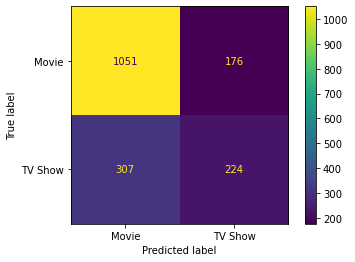

In [47]:
plot_confusion_matrix(rfc, X_test, y_test)

As we see above from confusion metrix 
* 1056 movie was predict correctly as movie
* 219 TV show was prdict correctly as Tv show  
* 312 TV shaow predict uncorrectly as movie 
* 171 movie was prdict uncorrectly as Tv show 

In [48]:
f1_score(y_test,rfc_pred,average='weighted')

0.7128881048284523

In [49]:
accuracy_score(y_test,rfc_pred)

0.7252559726962458

As the result of above we observed that the performance justfit between predction and train data wich is good

#### Start with data split with y that have only release_year that we interst in !!!

In [50]:
# Now with only release_year featur in y 
X_train,X_test,y_train,y_test = train_test_split(netflixDFcopy[['release_year']],netflixDFcopy['type'],test_size=0.2,random_state=42)

we are not going to aplly feature scaling since there is only one feature 

### <span style='color:#3398FF'> Logistic Regression Model and evaluation with one feature that we intrest </span>

In [51]:
# logistic regression algorithm 
lr = LogisticRegression()

lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

print('WITH Logistic Algorithm')
print('\n')
print(confusion_matrix(y_test,lr_pred))
print('\n')
print(classification_report(lr_pred,y_test,zero_division=1))

WITH Logistic Algorithm


[[1227    0]
 [ 531    0]]


              precision    recall  f1-score   support

       Movie       1.00      0.70      0.82      1758
     TV Show       0.00      1.00      0.00         0

    accuracy                           0.70      1758
   macro avg       0.50      0.85      0.41      1758
weighted avg       1.00      0.70      0.82      1758



Since our target class unbalanced we check weighted avg which is 82% which is better than the previous 

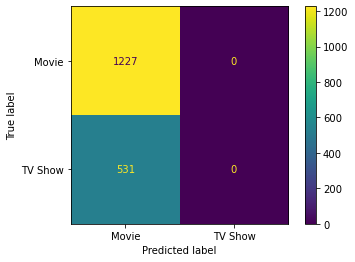

In [52]:
plot_confusion_matrix(lr, X_test, y_test)

As we see above from confusion metrix 
* 1227 movie was predict correctly as movie
* 0 TV show was prdict correctly as Tv show  
* 531 TV shaow predict uncorrectly as movie 
* 0 movie was prdict uncorrectly as Tv show 

In [53]:
f1_score(y_test,lr_pred,average='weighted')

0.5737938840962491

In [54]:
accuracy_score(y_test,lr_pred)

0.6979522184300341

As the result of above we observed that the performance underfit between predction and train data

### <span style='color:#3398FF'> KNN Model and evaluation with one feature that we intrest </span>

In [55]:
# k-nearest neighbors algorithm
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

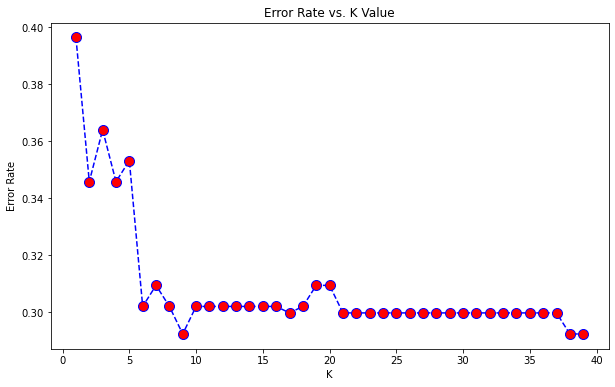

In [56]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

using elbow method help us to select KNN value with less error rate and the result above is k=9

In [57]:
# with the plot above will choose K9 that have least error
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print('WITH K=9')
print('\n')
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

WITH K=9


[[1168   59]
 [ 455   76]]


              precision    recall  f1-score   support

       Movie       0.72      0.95      0.82      1227
     TV Show       0.56      0.14      0.23       531

    accuracy                           0.71      1758
   macro avg       0.64      0.55      0.52      1758
weighted avg       0.67      0.71      0.64      1758



Since our target class unbalanced we check weighted avg which is 64% and the result is worse than logistic model wich is 82% and the previous

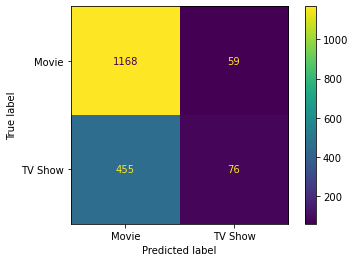

In [58]:
plot_confusion_matrix(knn, X_test, y_test)

As we see above from confusion metrix 
* 1168 movie was predict correctly as movie
* 76 TV show was prdict correctly as Tv show  
* 455 TV shaow predict uncorrectly as movie 
* 59 movie was prdict uncorrectly as Tv show 

In [59]:
f1_score(y_test,knn_pred,average='weighted')

0.6410117536253697

In [60]:
accuracy_score(y_test,knn_pred)

0.7076222980659841

As the result of above we observed that the performance underfit between predction and train data

### <span style='color:#3398FF'> Random Forest Model and evaluation with one feature that we intrest </span>

In [61]:
# applay Random Forest Classifier
rfc= RandomForestClassifier()

rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

print('WITH Random Forest Algorithm')
print('\n')
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(rfc_pred,y_test))

WITH Random Forest Algorithm


[[1168   59]
 [ 455   76]]


              precision    recall  f1-score   support

       Movie       0.95      0.72      0.82      1623
     TV Show       0.14      0.56      0.23       135

    accuracy                           0.71      1758
   macro avg       0.55      0.64      0.52      1758
weighted avg       0.89      0.71      0.77      1758



Since our target class unbalanced we check weighted avg which is 77% and the result is better KNN which is 64% and worse than logistic model wich is 82% and better than the previous

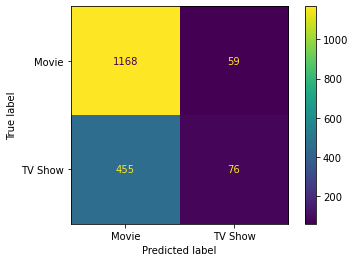

In [62]:
plot_confusion_matrix(rfc, X_test, y_test)

As we see above from confusion metrix 
* 1168 movie was predict correctly as movie
* 76 TV show was prdict correctly as Tv show  
* 455 TV shaow predict uncorrectly as movie 
* 59 movie was prdict uncorrectly as Tv show 

In [63]:
f1_score(y_test,rfc_pred,average='weighted')

0.6410117536253697

In [64]:
accuracy_score(y_test,rfc_pred)

0.7076222980659841

As the result of above we observed that the performance underfit between predction and train data

# <span style='color:#E50914'> 8/ Conclusion </span> 

* With all feature the best model was Logistc Algorthim with 79% 

* With only intrest feature the best model was aslo Logistc Algorthim with 82% 

in reslut the best model is Logistc Algorthim with our interst feature that we assume in the beginning

Thank you!!    Maha Abdullah Alqahtani